In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, TimeDistributed, Bidirectional, LSTM, Input, UpSampling2D, RepeatVector
from tensorflow.keras.optimizers import RMSprop
import pyedflib as ped

In [3]:
chb01_reshaped = np.load('npy_arrays\chb01.npy')

In [4]:
np.shape(chb01_reshaped)

(37373440, 23)

In [4]:
type(chb01_reshaped[0][0])

numpy.float16

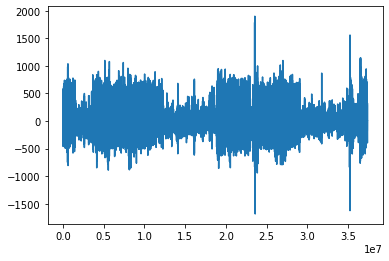

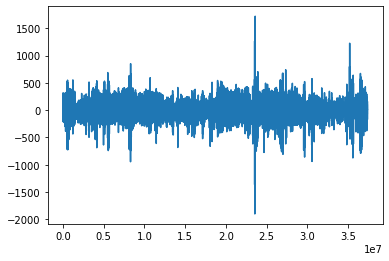

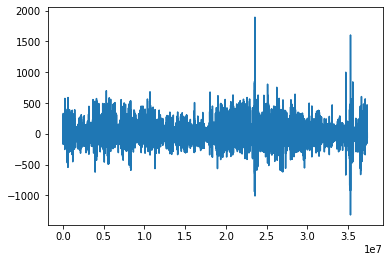

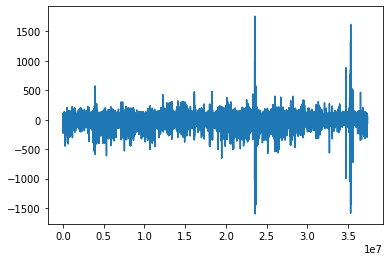

In [5]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.figure()
    plt.plot(range(np.shape(chb01_reshaped)[0]),chb01_reshaped.transpose()[i])
    plt.show()

In [5]:
chb01_reshaped = np.reshape(chb01_reshaped,(29198,1280,23))

## Picking equal number of Pre-Ictal and Inter-Ictal examples
First seizure - chb01_03, Second - chb01_04, Inter-Ictal - chb01_01

In [6]:
X = chb01_reshaped[1678:2038]
y = np.ones(360)

In [7]:
X = np.append(X,chb01_reshaped[2092:2452],axis=0)
y = np.append(y,np.ones(360))

In [8]:
X = np.append(X,chb01_reshaped[0:720],axis=0)
y = np.append(y,np.zeros(720))

Third seizure - chb01_15, Fourth - chb01_16, Inter-Ictal - chb01_13

In [9]:
X = np.append(X,chb01_reshaped[10065:10425],axis=0)
y = np.append(y,np.ones(360))
X = np.append(X,chb01_reshaped[10642:11002],axis=0)
y = np.append(y,np.ones(360))
X = np.append(X,chb01_reshaped[8639:9359],axis=0)
y = np.append(y,np.zeros(720))

In [10]:
X2 = chb01_reshaped[12223:12583]
y2 = np.ones(360)
X2 = np.append(X2,chb01_reshaped[13917:14277],axis=0)
y2 = np.append(y2,np.ones(360))
X2 = np.append(X2,chb01_reshaped[15652:16372],axis=0)
y2 = np.append(y2,np.zeros(720))
X2 = np.append(X2,chb01_reshaped[17824:18184],axis=0)
y2 = np.append(y2,np.ones(360))
X2 = np.append(X2,chb01_reshaped[16373:16733],axis=0)
y2 = np.append(y2,np.zeros(360))

In [11]:
X = np.append(X,X2,axis=0)
y = np.append(y,y2,axis=0)

## CNN Model

In [9]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 2),input_shape = (1280,23,1),activation='relu', padding='same'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, (3, 2), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(32, (3, 2), activation='relu'))
cnn.add(MaxPool2D((2, 2)))
cnn.add(Flatten())
# cnn.add(tf.keras.layers.Lambda(np.expand_dims))
# cnn.add(Bidirectional(LSTM(32,return_sequences=False)))
cnn.add(Dense(300,activation='relu'))
cnn.add(Dense(100,activation='relu'))
cnn.add(Dense(50,activation='relu'))
cnn.add(Dense(20,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))


# cnn.add(Dense(128, activation='relu'))
# cnn.add(Dense(3, activation='softmax'))

cnn.compile(optimizer='rmsprop',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1280, 23, 32)      224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 640, 11, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 640, 11, 32)       128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 638, 10, 32)       6176      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 319, 5, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 319, 5, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 317, 4, 32)        6

In [11]:
hist = cnn.fit(np.expand_dims(X,axis=3),y,epochs=20)#validation_data=(X_test,y_test)

Epoch 1/20
90/90 [==============================] - 2s 27ms/step - loss: 0.5933 - acc: 0.9118
Epoch 2/20
90/90 [==============================] - 2s 27ms/step - loss: 0.0585 - acc: 0.9858
Epoch 3/20
90/90 [==============================] - 2s 27ms/step - loss: 0.0472 - acc: 0.9875
Epoch 4/20
90/90 [==============================] - 2s 27ms/step - loss: 0.0380 - acc: 0.9927
Epoch 5/20
90/90 [==============================] - 2s 27ms/step - loss: 0.0299 - acc: 0.9917
Epoch 6/20
90/90 [==============================] - 2s 27ms/step - loss: 0.0179 - acc: 0.9962
Epoch 7/20
90/90 [==============================] - 2s 27ms/step - loss: 0.0165 - acc: 0.9962
Epoch 8/20
90/90 [==============================] - 2s 27ms/step - loss: 0.0099 - acc: 0.9976
Epoch 9/20
90/90 [==============================] - 2s 27ms/step - loss: 6.9412e-05 - acc: 1.0000
Epoch 10/20
90/90 [==============================] - 2s 27ms/step - loss: 0.0171 - acc: 0.9990
Epoch 11/20
90/90 [==============================] - 2s

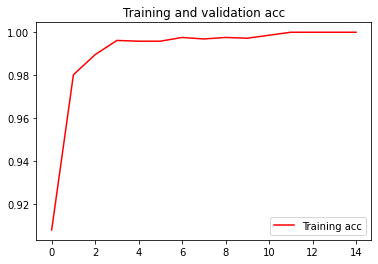

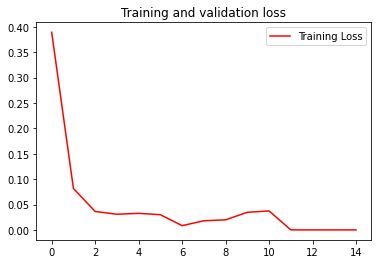

In [14]:
acc = hist.history['acc']# Your Code Here
loss = hist.history['loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
results = cnn.predict(np.expand_dims(X,axis=3))

In [16]:
sum(results==np.ones(np.shape(results)))

array([1437])

In [64]:
print(X.shape)
print(y.shape)

(2880, 1280, 23)
(2880,)


In [25]:
sum(y)

1440.0

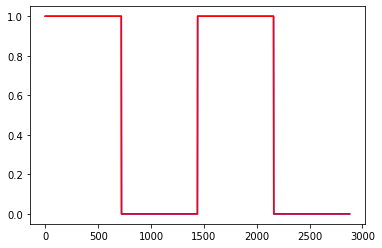

In [22]:
plt.plot(range(np.shape(y)[0]),results,"blue")
plt.plot(range(np.shape(y)[0]),y,"red")
plt.show()

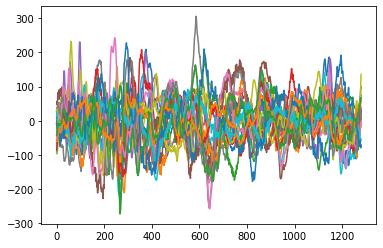

In [86]:
plt.plot(range(np.shape(X)[1]),X[0][:])
plt.show()

In [84]:
np.shape(X[0][:])

(1280, 23)

In [ ]:
X[0][:]

In [27]:
cnn.save('new_cnn_model.h5')

In [6]:
cnn = tf.keras.models.load_model('new_cnn_model.h5')

In [7]:
full_out = cnn.predict(np.expand_dims(chb01_reshaped[0:10000],3).astype(np.float16),verbose=1)

313/313 [==============================] - 3s 10ms/step


In [8]:
full_out

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

### First model trained on 4 seizures made to predict on the first 100000 time steps of chb01.
Seizures at 2092.2452,10065. We are able to see continous 1's ahead of the seizures but there is a high rate of false alarm.
Model requires further training on the other seizures and the model must be improved using LSTM layers, dataset has to be randomized, normalized.

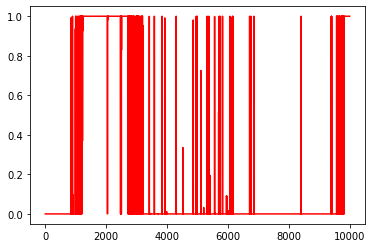

In [9]:
plt.figure()
plt.plot(range(np.shape(full_out)[0]),full_out,"red")
plt.show()


## LSTM Model

In [29]:
model = Sequential()

model.add(Bidirectional(LSTM(32,input_shape = (1280,23),return_sequences=True)))
model.add(Bidirectional(LSTM(32,input_shape = (1280,23),return_sequences=False)))

model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])


In [30]:
hist = model.fit(X,y,epochs=30)#validation_data=(X_test,y_test)

Epoch 1/30
90/90 [==============================] - 10s 106ms/step - loss: 0.4660 - acc: 0.7677
Epoch 2/30
90/90 [==============================] - 10s 106ms/step - loss: 0.1448 - acc: 0.9476
Epoch 3/30
90/90 [==============================] - 10s 106ms/step - loss: 0.0563 - acc: 0.9809
Epoch 4/30
90/90 [==============================] - 10s 106ms/step - loss: 0.0341 - acc: 0.9885
Epoch 5/30
90/90 [==============================] - 9s 105ms/step - loss: 0.0302 - acc: 0.9913
Epoch 6/30
90/90 [==============================] - 9s 105ms/step - loss: 0.0239 - acc: 0.9934
Epoch 7/30
90/90 [==============================] - 9s 105ms/step - loss: 0.0160 - acc: 0.9955
Epoch 8/30
90/90 [==============================] - 9s 105ms/step - loss: 0.0162 - acc: 0.9948
Epoch 9/30
90/90 [==============================] - 9s 105ms/step - loss: 0.0206 - acc: 0.9962
Epoch 10/30
90/90 [==============================] - 9s 105ms/step - loss: 0.0089 - acc: 0.9965
Epoch 11/30
90/90 [==========================

In [31]:
results = model.predict(X)

In [33]:
results = results>=0.5

In [34]:
results

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

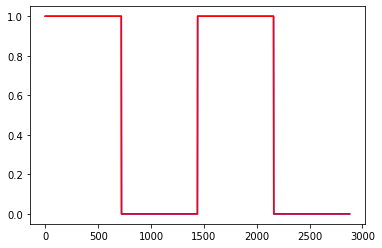

In [35]:
plt.plot(range(np.shape(y)[0]),results,"blue")
plt.plot(range(np.shape(y)[0]),y,"red")
plt.show()

In [36]:
model.save('new_lstm_model.h5')

In [43]:
full_out = model.predict(chb01_reshaped[10000:20000].astype(np.float16),verbose=1)

313/313 [==============================] - 15s 49ms/step


In [44]:
full_out = full_out>0.5

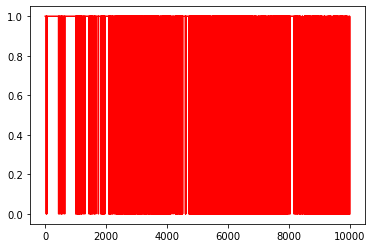

In [45]:
plt.plot(range(10000),full_out,"red")


plt.show()

To try: Combine outputs of LSTM and CNN layers before Dense Layers, Feed CNN output to LSTM

## CNN + LSTM

In [46]:
# cnn = Sequential()
# cnn.add(Conv2D(32, (3, 2),input_shape = (1280,23,1),activation='relu', padding='same'))
# cnn.add(MaxPool2D((2, 2)))
# cnn.add(BatchNormalization())
# cnn.add(Conv2D(32, (3, 2), activation='relu'))
# cnn.add(MaxPool2D((2, 2)))
# cnn.add(BatchNormalization())
# cnn.add(Conv2D(32, (3, 2), activatio(n='relu'))
# cnn.add(MaxPool2D((2, 2)))
# cnn.add(Flatten())

In [48]:
cnn = tf.keras.models.load_model('new_cnn_model.h5')

In [95]:
model = Sequential()

model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(32,return_sequences=False)))

model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [64]:
cnn2 = Sequential()

In [80]:
cnn2.add(cnn.layers.pop(8))

In [87]:
cnn2.compile(optimizer='rmsprop',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])


In [91]:
r1 = cnn2.predict(np.expand_dims(X,3))

In [98]:
hist = model.fit(np.expand_dims(r1,1),y,epochs=15)

Epoch 1/15
90/90 [==============================] - 1s 7ms/step - loss: 3.8538e-10 - acc: 1.0000
Epoch 2/15
90/90 [==============================] - 1s 7ms/step - loss: 3.2859e-10 - acc: 1.0000
Epoch 3/15
90/90 [==============================] - 1s 7ms/step - loss: 2.9798e-10 - acc: 1.0000
Epoch 4/15
90/90 [==============================] - 1s 7ms/step - loss: 2.7560e-10 - acc: 1.0000
Epoch 5/15
90/90 [==============================] - 1s 7ms/step - loss: 2.4515e-10 - acc: 1.0000
Epoch 6/15
90/90 [==============================] - 1s 7ms/step - loss: 2.2589e-10 - acc: 1.0000
Epoch 7/15
90/90 [==============================] - 1s 7ms/step - loss: 2.0841e-10 - acc: 1.0000
Epoch 8/15
90/90 [==============================] - 1s 7ms/step - loss: 1.9644e-10 - acc: 1.0000
Epoch 9/15
90/90 [==============================] - 1s 7ms/step - loss: 1.8359e-10 - acc: 1.0000
Epoch 10/15
90/90 [==============================] - 1s 7ms/step - loss: 1.7025e-10 - acc: 1.0000
Epoch 11/15
90/90 [==========

In [100]:
r2 = model.predict(np.expand_dims(cnn2.predict(np.expand_dims(X,3)),1))

In [102]:
r2 = r2 > 0.5

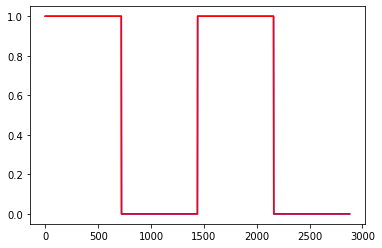

In [103]:
plt.plot(range(np.shape(y)[0]),r2,"blue")
plt.plot(range(np.shape(y)[0]),y,"red")
plt.show()

In [114]:
model.save('lstm_comb.h5')
cnn2.save('cnn_comb.h5')

In [111]:
cnn2 = tf.keras.models.load_model('cnn_comb.h5')

In [115]:
model = tf.keras.models.load_model('lstm_comb.h5')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [106]:
full_out = model.predict(np.expand_dims(cnn2.predict(np.expand_dims(chb01_reshaped[0:10000],3).astype(np.float16),verbose=1),1))

313/313 [==============================] - 3s 11ms/step


InternalError: Dst tensor is not initialized.

In [36]:
r2=cnn.evaluate(np.expand_dims(X2,3),y2)

68/68 [==============================] - 1s 10ms/step - loss: 8.5589 - acc: 0.7889


In [26]:
result = cnn.predict(np.expand_dims(X2,3))

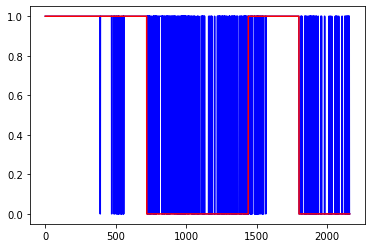

In [40]:
plt.plot(range(np.shape(y2)[0]),(result[:,0]>0.5),"blue")
plt.plot(range(np.shape(y2)[0]),y2,"red")
plt.show()

In [39]:
sum(y2==(result[:,0]>0.5))/len(y2)

0.7888888888888889

In [31]:
np.shape(result[:,0])

(2160,)

In [38]:
r2

[8.558915138244629, 0.7888888716697693]

## Repeat Vector Layer

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 2),input_shape = (1280,23,1),activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 2), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 2), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())

model.add(RepeatVector(1))

model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(32,return_sequences=False)))

model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1280, 23, 32)      224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 640, 11, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 640, 11, 32)       128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 638, 10, 32)       6176      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 319, 5, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 319, 5, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 317, 4, 32)        6

In [12]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X,y, test_size=0.3, shuffle=True)

without shuffle

In [12]:
hist = model.fit(np.expand_dims(X,3),y,epochs=20,validation_data=(np.expand_dims(X2,3),y2))

Epoch 1/20
90/90 [==============================] - 5s 50ms/step - loss: 0.3631 - acc: 0.8219 - val_loss: 0.5728 - val_acc: 0.8259
Epoch 2/20
90/90 [==============================] - 3s 37ms/step - loss: 0.0545 - acc: 0.9882 - val_loss: 0.6335 - val_acc: 0.8269
Epoch 3/20
90/90 [==============================] - 3s 37ms/step - loss: 0.0492 - acc: 0.9903 - val_loss: 0.6794 - val_acc: 0.8106
Epoch 4/20
90/90 [==============================] - 3s 37ms/step - loss: 0.0225 - acc: 0.9951 - val_loss: 1.5675 - val_acc: 0.6963
Epoch 5/20
90/90 [==============================] - 3s 37ms/step - loss: 0.0188 - acc: 0.9958 - val_loss: 0.6219 - val_acc: 0.8546
Epoch 6/20
90/90 [==============================] - 3s 37ms/step - loss: 0.0157 - acc: 0.9965 - val_loss: 0.9974 - val_acc: 0.8319
Epoch 7/20
90/90 [==============================] - 3s 37ms/step - loss: 0.0113 - acc: 0.9972 - val_loss: 0.9924 - val_acc: 0.8125
Epoch 8/20
90/90 [==============================] - 3s 37ms/step - loss: 0.0042 - a

with shuffle

In [15]:
hist = model.fit(np.expand_dims(x_tr,3),y_tr,epochs=20,validation_data=(np.expand_dims(x_te,3),y_te))

Epoch 1/20
111/111 [==============================] - 5s 47ms/step - loss: 0.2662 - acc: 0.8980 - val_loss: 0.2945 - val_acc: 0.9127
Epoch 2/20
111/111 [==============================] - 4s 35ms/step - loss: 0.1350 - acc: 0.9575 - val_loss: 0.1181 - val_acc: 0.9676
Epoch 3/20
111/111 [==============================] - 4s 35ms/step - loss: 0.1096 - acc: 0.9649 - val_loss: 0.1581 - val_acc: 0.9590
Epoch 4/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0941 - acc: 0.9694 - val_loss: 0.1650 - val_acc: 0.9577
Epoch 5/20
111/111 [==============================] - 4s 34ms/step - loss: 0.0719 - acc: 0.9793 - val_loss: 0.1655 - val_acc: 0.9504
Epoch 6/20
111/111 [==============================] - 4s 34ms/step - loss: 0.0616 - acc: 0.9799 - val_loss: 0.1234 - val_acc: 0.9709
Epoch 7/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0523 - acc: 0.9819 - val_loss: 0.0768 - val_acc: 0.9802
Epoch 8/20
111/111 [==============================] - 4s 35ms/step - 

In [17]:
model.save('lstm_cnn_chb01.h5')

In [13]:
model = tf.keras.models.load_model('lstm_cnn_chb01.h5')

In [19]:
result = model.predict(np.expand_dims(X,3))

MemoryError: 

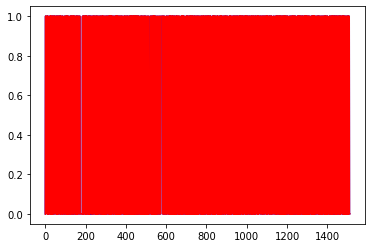

In [18]:
plt.plot(range(np.shape(y)[0]),(result[:,0]>0.5),"blue")
plt.plot(range(np.shape(y)[0]),y,"red")
plt.show()